# Roller Coaster

#### Overview

This project is slightly different than others you have encountered thus far. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem that you cannot easily solve.

#### Project Goals

You will work to create several data visualizations that will give you insight into the world of roller coasters.

## Prerequisites

In order to complete this project, you should have completed the first two lessons in the [Data Analysis with Pandas Course](https://www.codecademy.com/learn/data-processing-pandas) and the first two lessons in the [Data Visualization in Python course](https://www.codecademy.com/learn/data-visualization-python). This content is also covered in the [Data Scientist Career Path](https://www.codecademy.com/learn/paths/data-science/).

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

   Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [1]:
# 1 
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load rankings data
wood_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
# load rankings data
steel_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

2. Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

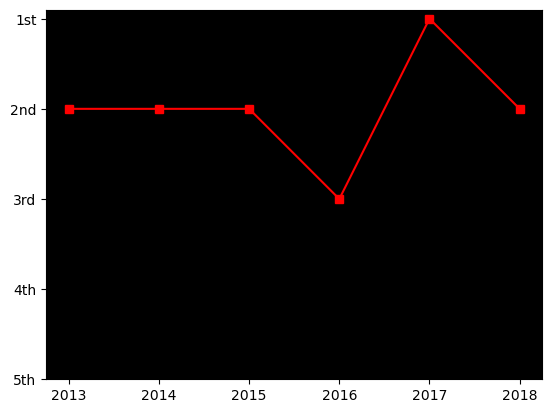

In [2]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
fig = plt.subplots(1,1)
ax = plt.subplot()

def plot_coaster_rank(df, coaster_name, coaster_park):
    coaster_rank = df[((df['Name'] == coaster_name) & (df['Park'] == coaster_park))]
    
    plt.plot(coaster_rank['Year of Rank'], coaster_rank['Rank'], color='red', marker='s')
    
    ax.set_yticks([1,2,3,4,5])
    ax.set_yticklabels(['1st','2nd','3rd','4th','5th'])    
    ax.invert_yaxis()
    ax.set_facecolor('Black')

    plt.show()
    
plot_coaster_rank(wood_rankings, 'El Toro', 'Six Flags Great Adventure')

# Create a plot of El Toro ranking over time

3. Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as one roller coaster name, `"Boulder Dash"` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

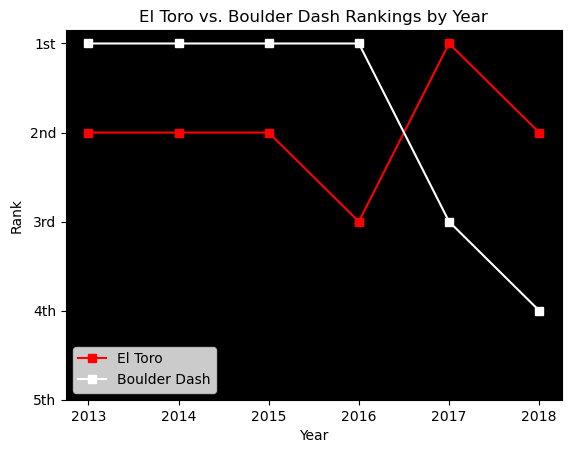

In [3]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
fig = plt.subplots(1,1)
ax = plt.subplot()

def plot_coaster_rank_vs(df, coaster_name1, coaster_park1, coaster_name2, coaster_park2):
    coaster_rank1 = df[((df['Name'] == coaster_name1) & (df['Park'] == coaster_park1))]
    coaster_rank2 = df[((df['Name'] == coaster_name2) & (df['Park'] == coaster_park2))]
    
    plt.plot(coaster_rank1['Year of Rank'], coaster_rank1['Rank'], color='red', marker='s', label = coaster_name1)
    plt.plot(coaster_rank2['Year of Rank'], coaster_rank2['Rank'], color='white', marker='s', label = coaster_name2)
    plt.legend(loc = 3)
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title('{} vs. {} Rankings by Year'.format(coaster_name1, coaster_name2))
    
    ax.set_yticks([1,2,3,4,5])
    ax.set_yticklabels(['1st','2nd','3rd','4th','5th'])    
    ax.invert_yaxis()
    ax.set_facecolor('Black')

    plt.show()
    
plot_coaster_rank_vs(wood_rankings, 'El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce')

# Create a plot of El Toro ranking over time
# Create a plot of El Toro and Boulder Dash roller coasters

4. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

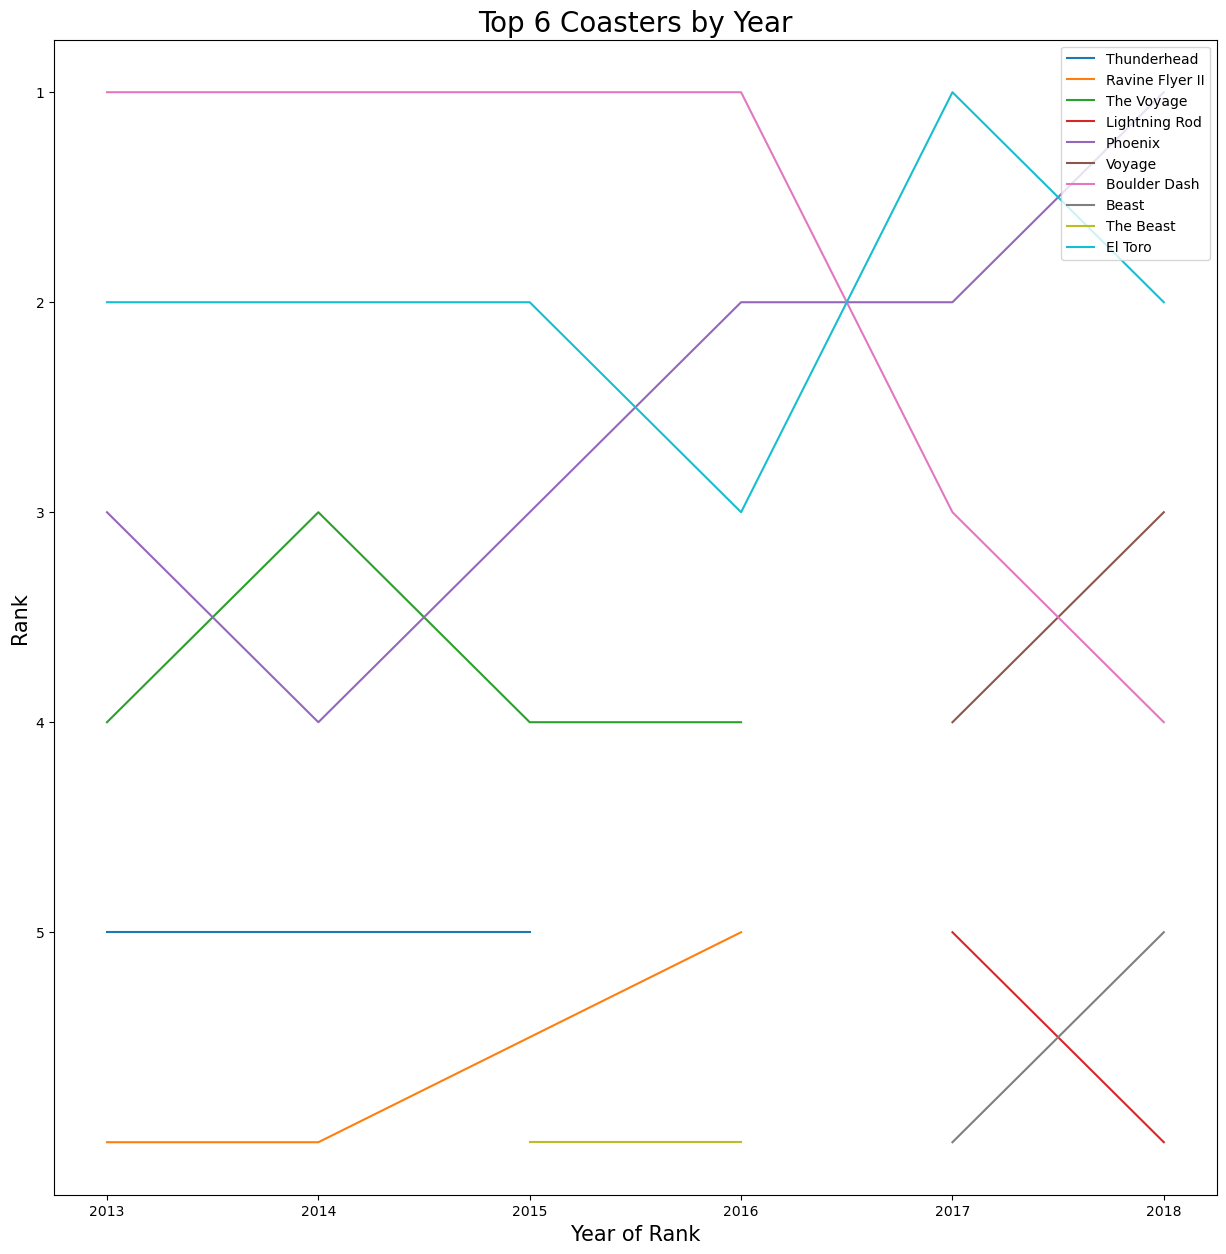

<Figure size 640x480 with 0 Axes>

In [4]:
# 4
# Create a function to plot top n rankings over time

def top_coasters(df, num_coasters):
    
    top_rankings =df[df['Rank'] <= num_coasters]
    fig = plt.subplots(figsize=(15,15))
    ax = plt.subplot()

    #For loop to itterate through the set of names in the given ranks identified, isolating a specific coaster, and plotting it.
    for i in set(top_rankings['Name']):
        coaster_rankings = top_rankings[top_rankings['Name'] == i]
        plt.plot(coaster_rankings['Year of Rank'], coaster_rankings['Rank'], label = i)

    #Cosmetics and axis adjustments
    plt.legend(loc=1)
    plt.ylabel('Rank', fontsize=15)
    plt.xlabel('Year of Rank', fontsize=15)
    plt.title('Top {} Coasters by Year'.format(str(num_coasters)), fontsize=20)
    
    ax.set_xticks([i for i in df['Year of Rank'].unique()])
    ax.invert_yaxis()
    ax.set_yticks([i for i in range(1, num_coasters)])

    plt.show()
    plt.clf()

#Itterate through df for the number of ranks that you want, but filter by year. plt

top_coasters(wood_rankings, 6)

5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [5]:
# 5
# load roller coaster data
coaster_ratings = pd.read_csv('roller_coasters.csv')

print(coaster_ratings.dtypes, coaster_ratings.head())

name               object
material_type      object
seating_type       object
speed             float64
height            float64
length            float64
num_inversions    float64
manufacturer       object
park               object
status             object
dtype: object             name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  Wi

6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

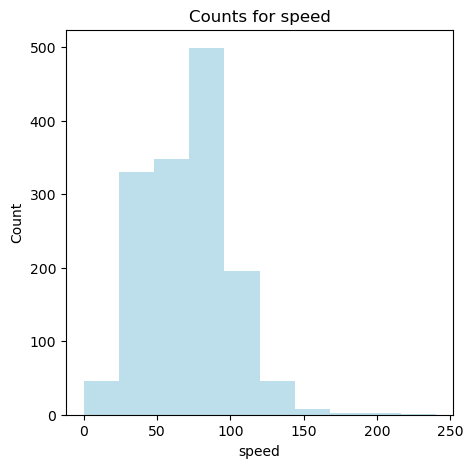

<Figure size 640x480 with 0 Axes>

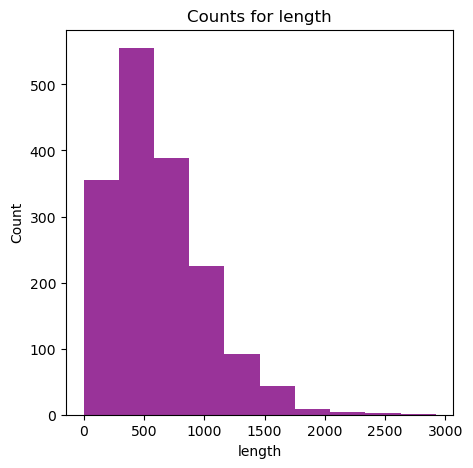

<Figure size 640x480 with 0 Axes>

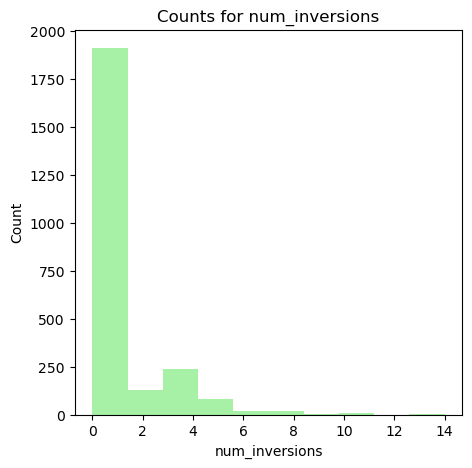

<Figure size 640x480 with 0 Axes>

In [6]:
# 6
# Create a function to plot histogram of column values

def hist_plotter(df, column, color):
    fig = plt.subplots(figsize = (5,5))
    ax = plt.subplot()
    
    plt.hist(df[column], alpha = 0.8, color = color)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Counts for {}'.format(column))
    plt.show()
    plt.clf()
    
# Create histogram of roller coaster speed
hist_plotter(coaster_ratings, 'speed', 'lightblue')

# Create histogram of roller coaster length
hist_plotter(coaster_ratings, 'length', 'purple')

# Create histogram of roller coaster number of inversions
hist_plotter(coaster_ratings, 'num_inversions', 'lightgreen')


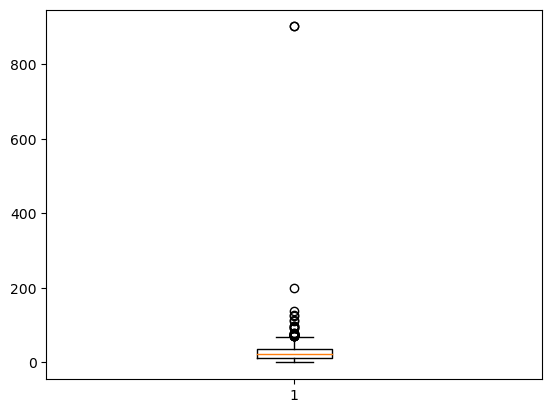

<Figure size 640x480 with 0 Axes>

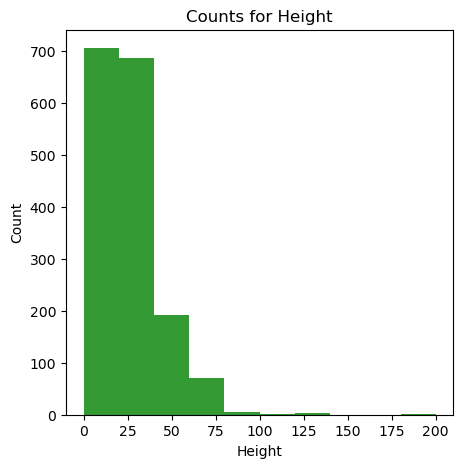

<Figure size 640x480 with 0 Axes>

In [7]:
# Create a function to plot histogram of height values
coaster_heights = coaster_ratings['height'].dropna()

fig = plt.subplots(1,1)

plt.boxplot(coaster_heights)
plt.show()
plt.clf()

def hist_plotter_height(df, color):
    fig = plt.subplots(figsize = (5,5))
    ax = plt.subplot()
    heights = df[df['height'] <= 800]
    
    plt.hist(heights['height'], alpha = 0.8, color = color)
    plt.xlabel('Height')
    plt.ylabel('Count')
    plt.title('Counts for Height')
    plt.show()
    plt.clf()
    
hist_plotter_height(coaster_ratings,'green')

7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

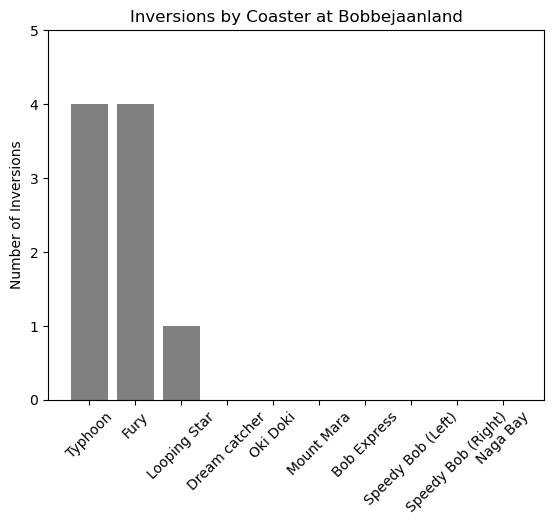

In [35]:
fig = plt.subplots(1,1)
ax = plt.subplot()

def inversions_by_coaster(df, park_name):
    
    park_coasters = df[df['park'] == park_name]
    park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
    num_inversions = park_coasters['num_inversions']
    coaster_names = park_coasters.name.unique()
        
    ax.set_xticks(range(len(coaster_names)))
    ax.set_xticklabels(coaster_names, rotation = 45)
    ax.set_yticks(range(0,6))
    
    plt.bar(range(len(num_inversions)), num_inversions, color='Grey')
    plt.title('Inversions by Coaster at {}'.format(park_name))
    plt.ylabel('Number of Inversions')
    plt.show()
    plt.close()
    
inversions_by_coaster(coaster_ratings, 'Bobbejaanland')

8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

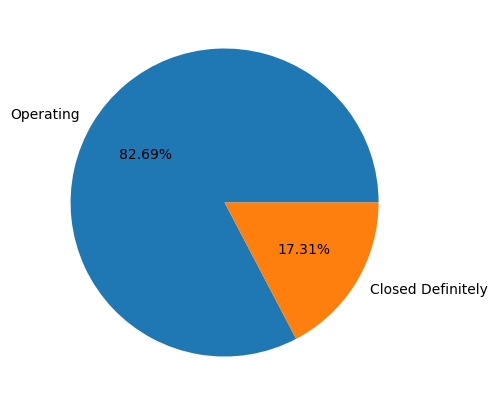

In [28]:
#status.operating, status.closed.definitely

operating_coasters = coaster_ratings[coaster_ratings.status == 'status.operating']
closed_coasters = coaster_ratings[coaster_ratings.status == 'status.closed.definitely']

operating_coasters = operating_coasters.drop_duplicates(subset='name')
closed_coasters = closed_coasters.drop_duplicates(subset='name')

num_operating = len(operating_coasters.name.unique())
num_closed = len(closed_coasters.name.unique())

fig = plt.figure(figsize=(5,5))
plt.pie([num_operating, num_closed], autopct= '%0.02f%%', labels=['Operating','Closed Definitely'])
plt.show()

9. `.scatter()` is another useful function in matplotlib that you might not have seen before. `.scatter()` produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between two variables. Find [`.scatter()`'s documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

   Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

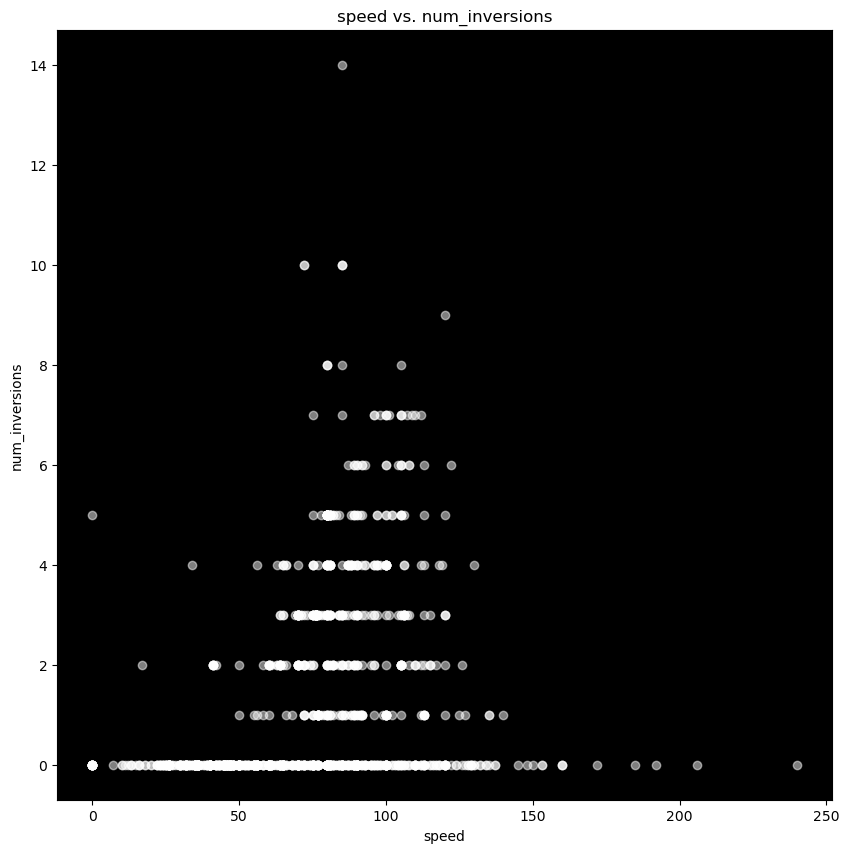

In [39]:
# 9
# Create a function to plot scatter of any two columns
def scatter(df, col1, col2):
    
    column_1_data = df[col1]
    column_2_data = df[col2]
    
    fig = plt.figure(figsize=(10,10))
    
    ax = plt.subplot()
    ax.set_facecolor('black')
    
    plt.scatter(column_1_data, column_2_data, color='white', alpha=0.5)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs. {}'.format(col1, col2))
    plt.show()
    plt.close()

# Create a function to plot scatter of speed vs num_inversions
scatter(coaster_ratings, 'speed','num_inversions')